In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/position-salaries/Position_Salaries.csv


In [34]:
data = pd.read_csv("/kaggle/input/position-salaries/Position_Salaries.csv")

In [35]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Dropping Position Column As It Is Clear, Level Column represents Position In Hierarchy

In [36]:
data.drop("Position", axis=1, inplace=True)

In [37]:
data

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [40]:
x = data["Level"].values
y = data["Salary"].values

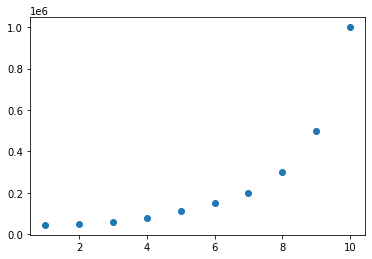

In [41]:
plt.scatter(x, y)

# Applying Train Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Visualizing Linear Regression Model

In [48]:
regressor=LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [49]:
# R-Squares Error Is:
print("R-Square Error:", r2_score(y_test, regressor.predict(X_test.reshape(-1, 1))))

R-Square Error: 0.418032026284049


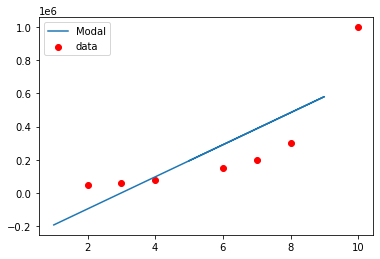

In [50]:
plt.plot(X_test, regressor.predict(X_test.reshape(-1, 1)), label="Modal")
plt.scatter(X_train, y_train, label="data", color="Red")
plt.legend()
plt.show()

### We can clearly see our R-Square covers only 41% of data and the line visualization is clearly under-fitting. We Need To Change Our Curve

# Applying Polynomial Regression Of Degree 2

In [78]:
polynomial = PolynomialFeatures(degree = 2)

In [79]:
X_polynomial = polynomial.fit_transform(X_train.reshape(-1, 1))

In [80]:
poly_regressor=LinearRegression()
poly_regressor.fit(X_polynomial, y_train)

LinearRegression()

In [81]:
X_test_polynomial =polynomial.transform(X_test.reshape(-1, 1))

In [82]:
# R-Square Test
# R-Squares Error Is:
print("R-Square Error:", r2_score(y_test, poly_regressor.predict(X_test_polynomial)))

R-Square Error: 0.40738739047907324


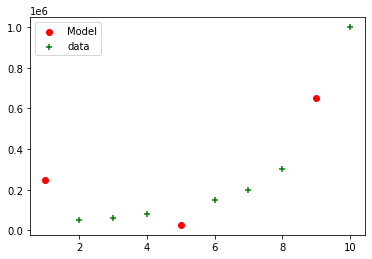

In [83]:
plt.scatter(X_test, poly_regressor.predict(X_test_polynomial), label="Model",color='red')
plt.scatter(X_train, y_train, label="data", marker='+',color='green')
#plt.scatter(X,y,label="Training data")
plt.legend()
plt.show()

# We Can See That These Model Is 2D  Curve And Tries To Cover Most Of The Point, R-Square is still low in number becase of how less the data is. If we furthur increase degree of our polynomial we tends to overfit our data.